In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [2]:
data = pd.read_csv ("C:/Users/Cyber Trap/Desktop/PHP/AIDS_Classification.csv")
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [4]:
data.dropna(inplace=True)

In [5]:
x=data.drop(['infected'],axis=1)
y=data['infected']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [13]:
model = DecisionTreeClassifier(random_state=42)

In [14]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = model.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print (f'accuracy:{accuracy}')
print ('Classification Report:')
print (classification_report(y_test, y_pred))
print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_pred))

accuracy:0.8504672897196262
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       330
           1       0.66      0.70      0.68        98

    accuracy                           0.85       428
   macro avg       0.79      0.80      0.79       428
weighted avg       0.85      0.85      0.85       428

Confusion Matrix:
[[295  35]
 [ 29  69]]


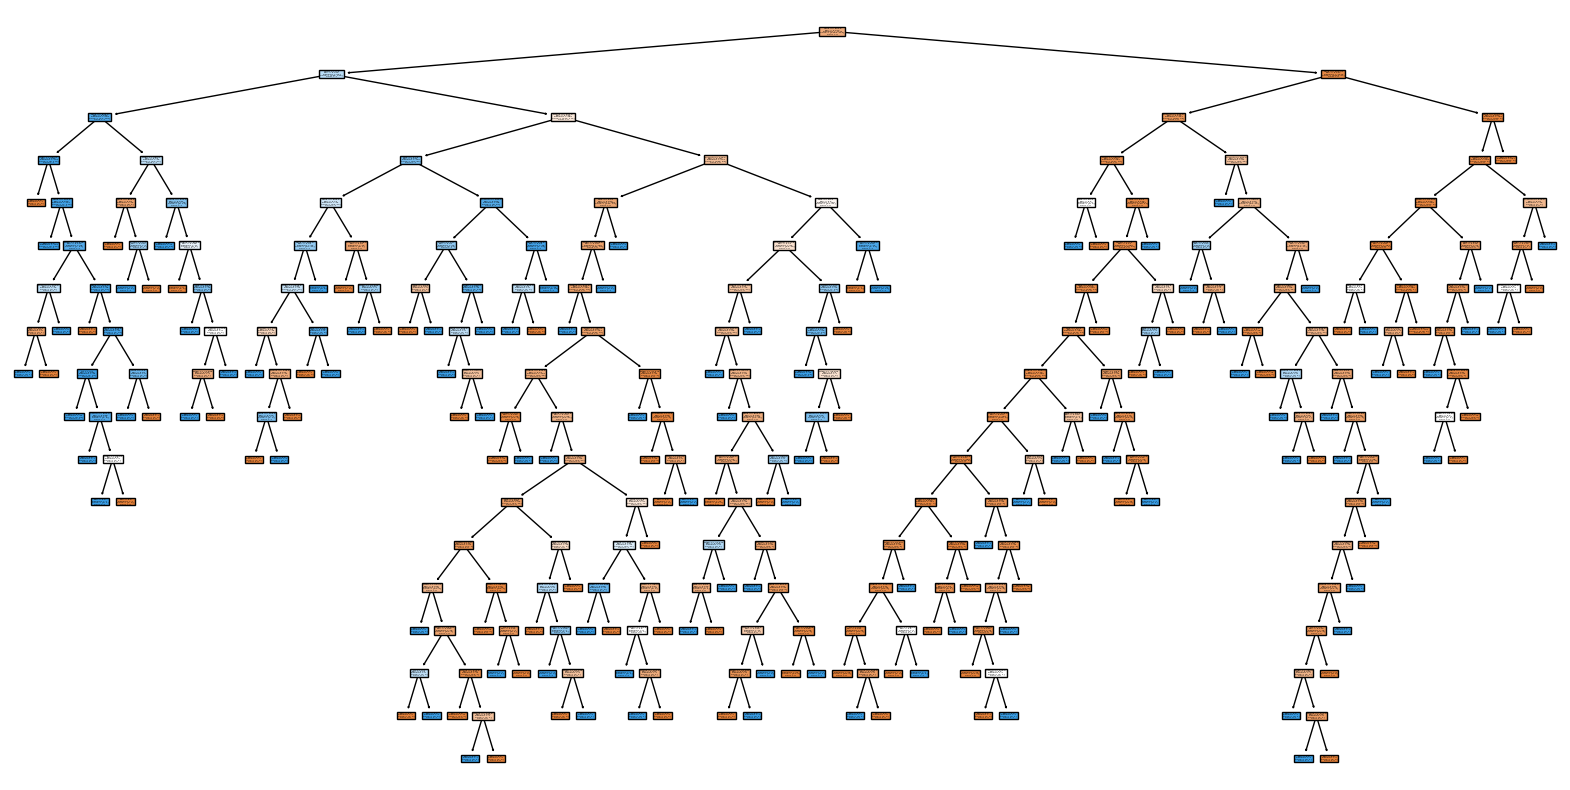

In [18]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=x.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()